### Libarary

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load Data 

In [180]:
df = pd.read_csv("D:/Abdullah_important/My Work/ML Algo/Task1_ELEVVO/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Uderstand Data

In [181]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [182]:
df.head()
df.loc[df["Exam_Score"]>=90,:]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
529,15,83,Medium,Medium,No,7,97,Medium,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Female,97
770,24,96,Low,High,No,6,93,Medium,Yes,2,Low,Medium,Public,Neutral,2,No,High School,Moderate,Female,94
836,29,76,Medium,Medium,No,8,96,Low,Yes,2,Low,Medium,Public,Positive,2,No,Postgraduate,Moderate,Male,94
919,21,74,High,Medium,No,6,94,Medium,Yes,1,Low,High,Public,Positive,1,No,High School,Near,Male,97
1109,31,69,Medium,Medium,No,7,52,Medium,No,2,High,Low,Public,Neutral,5,No,College,Far,Male,92
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
2292,21,70,High,High,No,9,66,Medium,Yes,1,Medium,Low,Public,Neutral,4,No,College,Moderate,Male,91
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3124,19,90,Medium,High,Yes,5,90,Low,Yes,0,Low,Medium,Public,Neutral,2,No,College,Far,Female,94


### Missing Value 

In [183]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [184]:
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace = True)
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace = True)
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace = True)

df.isnull().sum()



C:\Users\work\AppData\Local\Temp\ipykernel_14104\320378651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace = True)
C:\Users\work\AppData\Local\Temp\ipykernel_14104\320378651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Num Features Visulaization 

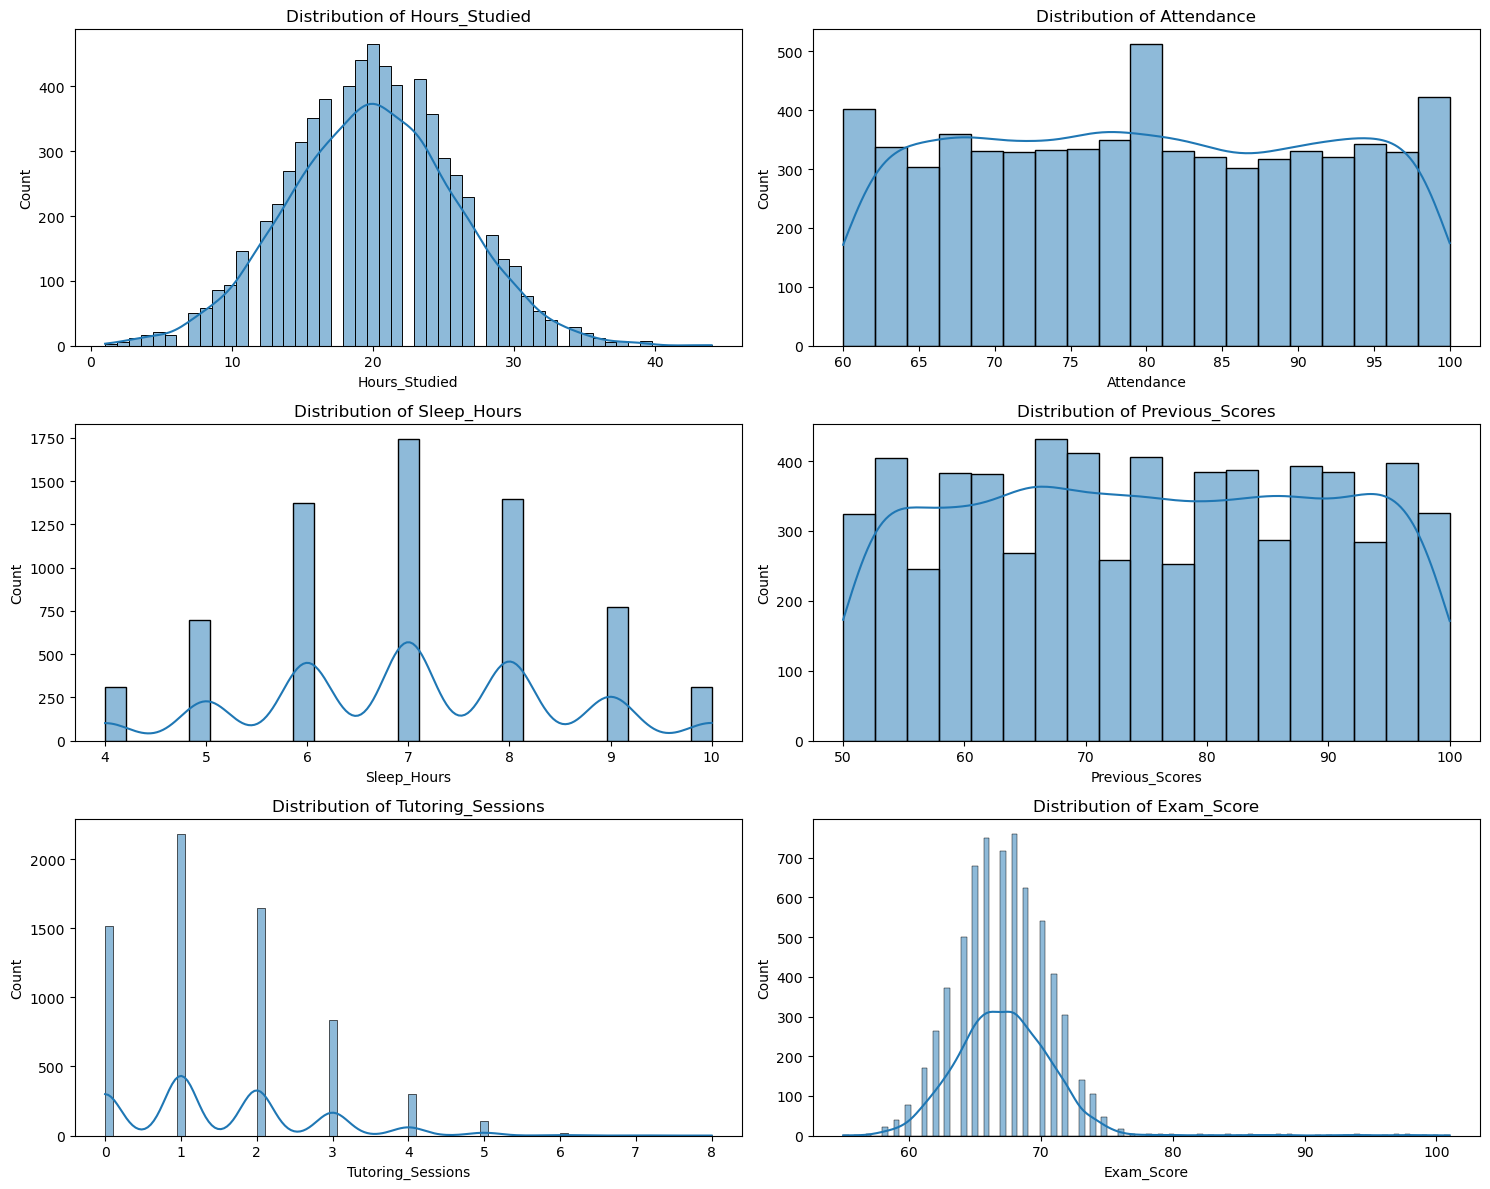

In [185]:
Numerical_columns = ["Hours_Studied","Attendance","Sleep_Hours","Previous_Scores","Tutoring_Sessions","Exam_Score"]
plt.figure(figsize=(15,12))
for i, col in enumerate(Numerical_columns, 1):
    plt.subplot(3,2,i) 
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


### Optimize the model

Bouns

In [186]:
df.drop(["Physical_Activity","Sleep_Hours"] , axis = 1 , inplace = True)

### Feature Encoding 

In [187]:
df = pd.get_dummies(df , columns = ["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality","Peer_Influence","Parental_Education_Level","Distance_from_Home"] ,drop_first = True ,dtype = int)

le = LabelEncoder()

for col in ["Extracurricular_Activities","Internet_Access","School_Type","Learning_Disabilities","Gender"]:
    df[col] = le.fit_transform(df[col])
    
df.info()
# All Data Are Numerical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Extracurricular_Activities             6607 non-null   int64
 3   Previous_Scores                        6607 non-null   int64
 4   Internet_Access                        6607 non-null   int64
 5   Tutoring_Sessions                      6607 non-null   int64
 6   School_Type                            6607 non-null   int64
 7   Learning_Disabilities                  6607 non-null   int64
 8   Gender                                 6607 non-null   int64
 9   Exam_Score                             6607 non-null   int64
 10  Parental_Involvement_Low               6607 non-null   int64
 11  Parental_Involvement_Medium   

In [188]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Extracurricular_Activities',
       'Previous_Scores', 'Internet_Access', 'Tutoring_Sessions',
       'School_Type', 'Learning_Disabilities', 'Gender', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Motivation_Level_Low', 'Motivation_Level_Medium', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near'],
      dtype='object')

### Check the linearity of Feature

In [189]:
corr = df.select_dtypes(["int64","float64"]).corr()
print(corr['Exam_Score'].sort_values(ascending=False))

### Features has Nonlinearity 

Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Peer_Influence_Positive                  0.081217
Distance_from_Home_Near                  0.080933
Extracurricular_Activities               0.064382
Internet_Access                          0.051475
Motivation_Level_Medium                  0.024771
Family_Income_Medium                     0.020995
Gender                                  -0.002032
Peer_Influence_Neutral                  -0.007795
School_Type                             -0.008844
Access_to_Resources_Medium              -0.026158
Parental_Involvement_Medium             -0.035978
Teacher_Quality_Low                     -0.041192
Distance_from_Home_Moderate             -0.043019
Teacher_Quality_Medium                  -0.043181


### Feature Scalling and Split Data

In [190]:
X = df.drop("Exam_Score" , axis = 1 )
Y = df["Exam_Score"]

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size  = .30 , random_state = 42)

Scaler = StandardScaler()

X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

### Linaer Regression Model

In [191]:
model = LinearRegression()
model.fit(X_train , Y_train)


Y_pred = model.predict(X_test)
print("Predicted Scores:", Y_pred)



mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("train_score: ",model.score(X_train,Y_train))
print("test_score: ",model.score(X_test,Y_test))

print("MSE:", mse)
print("R2 score:", r2)

#optimize
# Without change test_size to .30 the MSE = 3.1 , R^2 = .76



Predicted Scores: [64.09939027 65.39871868 71.54928753 ... 68.01285627 69.84055563
 66.1957669 ]
train_score:  0.7072104429157082
test_score:  0.770068681714073
MSE: 3.1592497140265094
R2 score: 0.770068681714073


### Polynomial Regression

Bouns

In [192]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()

model.fit(X_train_poly,Y_train)

Y_predected = model.predict(X_test_poly)

mse = mean_squared_error(Y_test, Y_predected)
r2 = r2_score(Y_test, Y_predected)

print("MSE:", mse)
print("R2 score:", r2)


# so the Linear Regression model is higher performance than ploy ----> the poly possibly do Overfitting because it's comlpex than Linear Model 

MSE: 3.549059198158332
R2 score: 0.7416982087600521
